## Project Overview:
<br>
  <li>Use Autoencoders to perform image denoising.
    <li>Autoencoders are a type of artificail neural network that are used to perform task of data encoding(representation learning).
    <li> Noisy image is fed from MNIST dataset as input.
     <li>The output is clean (denoised) image.
   


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#import seaborn as sns
import random



## Load the dataset

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

## Perfoming Data Visualisation

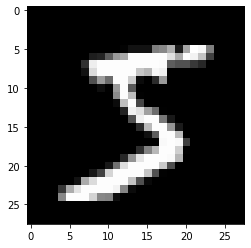

In [3]:
plt.imshow(X_train[0],cmap ='gray')

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

PERFORMING DATA VISUALISATION

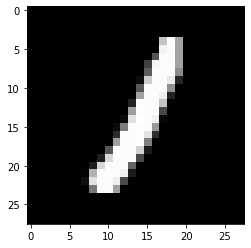

In [8]:
i = random.randint(1,60000)
plt.imshow(X_train[i],cmap = 'gray')

In [9]:
label=y_train[i]

In [10]:
label

1

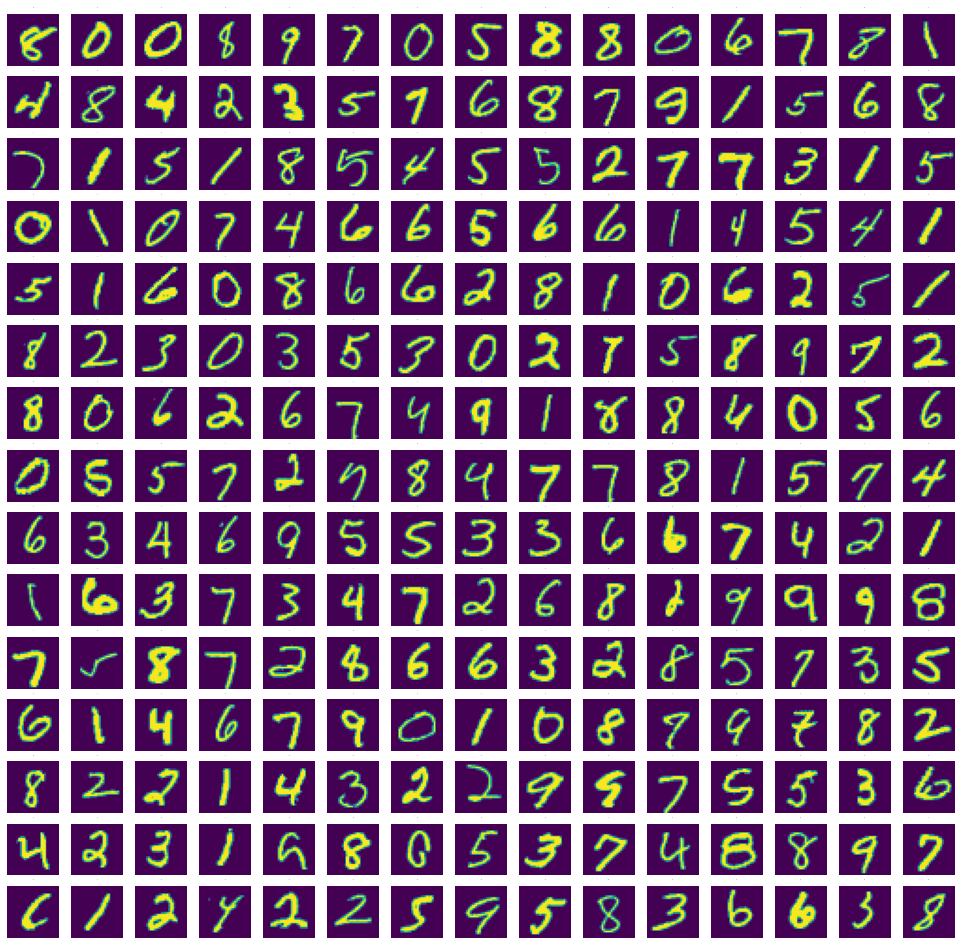

In [11]:
W_grid = 15
L_grid = 15

fig,axes = plt.subplots(L_grid,W_grid,figsize = (17,17))

axes = axes.ravel()  #flatten the training dataset
n_training  = len(X_train)

for i in np.arange(0,W_grid * L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize =0)
    axes[i].axis('off'  )

## Data Preprocessing

In [12]:
#nomalise data
X_train = X_train /255
X_test = X_test /255


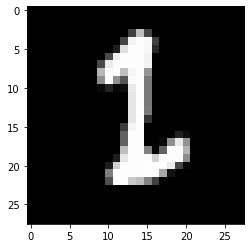

In [13]:
plt.imshow(X_train[70],cmap='gray')
 


## Adding Noise to Training and Testing data

In [14]:
#add some noise 
noise_factor =0.3
noise_dataset =[]

for img in X_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0.,1.)
    noise_dataset.append(noisy_image)
    
     

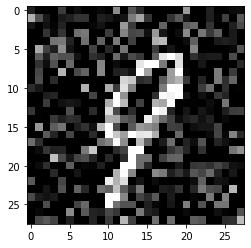

In [15]:
plt.imshow(noise_dataset[22],cmap='gray')
noise_dataset = np.array(noise_dataset)


In [16]:
noise_dataset.shape

(60000, 28, 28)

In [16]:
noise_factor =0.4
noise_test_dataset =[]

for img in X_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0.,1.)
    noise_test_dataset.append(noisy_image)

(10000, 28, 28)

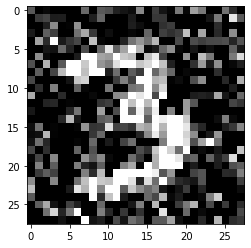

In [17]:
plt.imshow(noise_test_dataset[500],cmap ='gray')
noise_test_dataset= np.array(noise_test_dataset)
noise_test_dataset.shape

## Building and training autoencoder deep learning model 


In [20]:
autoencoder = tf.keras.models.Sequential()

#encoder 
autoencoder.add(tf.keras.layers.Conv2D(filters =16 ,kernel_size = 3,strides = 2,padding ='same' ,input_shape = (28,28,1)))

autoencoder.add(tf.keras.layers.Conv2D(filters =8,kernel_size = 3,strides = 2,padding ='same' ))
autoencoder.add(tf.keras.layers.Conv2D(filters =8,kernel_size = 3,strides = 1,padding ='same' ))

#decoder

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters =16 ,kernel_size = 3,strides = 2,padding ='same' ))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters =1 ,kernel_size = 3,strides = 2,activation = 'sigmoid',padding ='same' ))



In [21]:
autoencoder.compile(loss = 'binary_crossentropy' ,optimizer = tf.keras.optimizers.Adam(lr = 0.001)) 
autoencoder.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [22]:
  autoencoder.fit(noise_dataset.reshape(-1,28,28,1),
                  X_train.reshape(-1,28,28,1),
                  epochs =15,
                  batch_size = 20,
                  validation_data = (noise_test_dataset.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1 ))
  
  )

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 16s 272us/sample - loss: 0.1105 - val_loss: 0.1008
Epoch 2/15
60000/60000 [==============================] - 14s 229us/sample - loss: 0.0868 - val_loss: 0.0997
Epoch 3/15
60000/60000 [==============================] - 14s 233us/sample - loss: 0.0862 - val_loss: 0.0998
Epoch 4/15
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0859 - val_loss: 0.0997
Epoch 5/15
60000/60000 [==============================] - 14s 229us/sample - loss: 0.0856 - val_loss: 0.0995
Epoch 6/15
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0855 - val_loss: 0.0994
Epoch 7/15
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0854 - val_loss: 0.0997
Epoch 8/15
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0854 - val_loss: 0.0994
Epoch 9/15
60000/60000 [==============================] - 14s 232us/sample - l

## EVALUATE MODEL PERFOMANCE

In [23]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1))
print('Test Accuracy :{:.3f}'.format(evaluation))

10000/10000 [==============================] - 1s 94us/sample - loss: 0.0994
Test Accuracy :0.099


In [24]:
predicted = autoencoder.predict(noise_test_dataset[1:11].reshape(-1,28,28,1))

## Displaying the Output

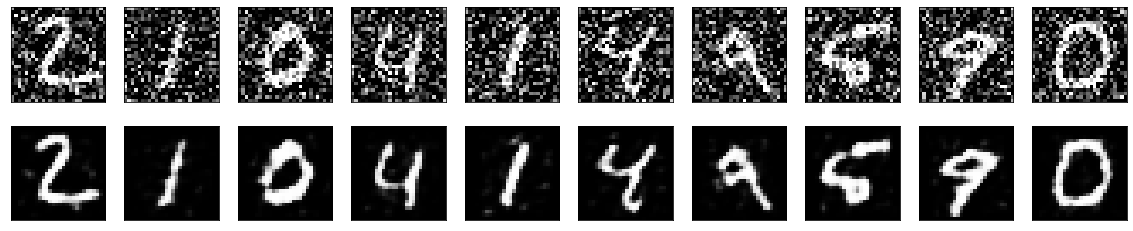

In [25]:
fig ,axes = plt.subplots(nrows= 2, ncols= 10 ,sharex= True,sharey = True, figsize=(20,4))
for images,row in zip([noise_test_dataset[1:11],predicted],axes):
    for img,ax in zip(images,row):
        ax.imshow(img.reshape((28,28)),cmap ='Greys_r')
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False)
        